<table style="width: 100%; height:auto; border-collapse: collapse;">
  <tr>
    <td style="width: 40%; text-align: left;">
      <img src="./img/uni_facultad.png" alt="Logo de la Universidad" style="width: 400px; height: auto;">
    </td>
    <td style="width: 30%; text-align: center; font-size: 18px;">
      <strong>Diego Alberto Rodríguez Cruz</strong>
    </td>
    <td style="width: 40%; text-align: right; font-size: 18px;">
        <strong>
      MINE-4101: Ciencia de Datos Aplicada<br>
      Taller 001
        </strong>
    </td>
  </tr>
</table>


# Taller 

## Contexto de negocio
Inversiones inmobiliarias para alquiler vacacional

## Objetivo
Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través de la plataforma AirBnb. Con la creciente popularidad de este modelo de negocio, es cada vez más difícil tomar buenas decisiones respecto a los mejores sectores de la ciudad, tipos de propiedad, entre otros factores, para lograr una rentabilidad adecuada a lo largo del tiempo. Una vez que la propiedad se encuentra listada en la plataforma, asegurar una alta tasa de ocupación estableciendo un precio por noche justo y un buen sistema de atención a los usuarios es vital para el éxito del negocio.

Para este fin se le ha proporcionado un dataset de propiedades listadas en AirBnb para una ciudad específica. Por cada propiedad se encuentran atributos como ubicación, detalles del host, tipo de propiedad, precio, disponibilidad futura, calificaciones, entre otros.

Mediante el uso de técnicas estadísticas y de visualización de datos se espera que usted esté en capacidad de descubrir patrones, tendencias y oportunidades que puedan ser de interés para un inversionista.

### Dataset
Salem, OR, Oregon, United States [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. 

* [Carga de datos](#Carga-de-datos)
* [Selección atributos](#Seleccion-atributos)
* [Análisis Univariado](#Analisis-Univariado)
* [Análisis Bivariado](#Analisis-Bivariado)
* [Conclusiones](#Conclusiones)

## Librerías

In [7]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import ast

In [8]:
# configuración
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## Carga de datos
([Volver al inicio](#Dataset))

In [10]:
# carga de dataset
listings_df = pd.read_csv("./data/listings.csv.gz", delimiter=',')

In [11]:
# dimension del dataset
print(f'Dimensiones del dataset: {listings_df.shape[0]} registros, {listings_df.shape[1]} columnas')

Dimensiones del dataset: 339 registros, 75 columnas


In [12]:
# tipos de datos de las columnas del dataset
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [13]:
# filtrar un registro especifico
listings_df[listings_df['id']==19983672]

id                            listing_url       scrape_id  \
23  19983672  https://www.airbnb.com/rooms/19983672  20240625175528   

   last_scraped       source                                       name  \
23   2024-06-25  city scrape  Classic Town Home on 50 acres of wetlands   

                                          description  \
23  Perfect for the single female professional in ...   

                                neighborhood_overview  \
23  Towering fir trees, expanses of green space an...   

                                          picture_url    host_id  \
23  https://a0.muscache.com/pictures/7f73ffad-0f7b...  141740262   

                                       host_url host_name  host_since  \
23  https://www.airbnb.com/users/show/141740262     Megan  2017-07-21   

   host_location                                         host_about  \
23     Salem, OR      Currently, I stay active with yoga, walkin...   

   host_response_time host_response_rate host_acceptance_rate  \
23                NaN                NaN                 100%   

   host_is_superhost                                 host_thumbnail_url  \
23                 f  https://a0.muscache.com/im/pictures/user/b1582...   

                                     host_picture_url host_neighbourhood  \
23  https://a0.muscache.com/im/pictures/user/b1582...                NaN   

    host_listings_count  host_total_listings_count host_verifications  \
23                    1                          1          ['phone']   

   host_has_profile_pic host_identity_verified            neighbourhood  \
23                    t                      f  Neighborhood highlights   

   neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude  \
23                 Ward 4                           NaN  44.85864   -123.021   

                property_type     room_type  accommodates  bathrooms  \
23  Private room in townhouse  Private room             2        1.0   

   bathrooms_text  bedrooms  beds  \
23  1 shared bath       1.0   1.0   

                                            amenities   price  minimum_nights  \
23  ["Bed linens", "Coffee maker", "Kitchen", "Ove...  $65.00               2   

    maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
23              90                       2                       2   

    minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
23                      90                      90                     2.0   

    maximum_nights_avg_ntm  calendar_updated has_availability  \
23                    90.0               NaN                t   

    availability_30  availability_60  availability_90  availability_365  \
23               23               53               83               173   

   calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
23            2024-06-25                  1                      0   

    number_of_reviews_l30d first_review last_review  review_scores_rating  \
23                       0   2017-08-22  2017-08-22                   5.0   

    review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
23                     5.0                        5.0                    5.0   

    review_scores_communication  review_scores_location  review_scores_value  \
23                          5.0                     5.0                  5.0   

    license instant_bookable  calculated_host_listings_count  \
23      NaN                f                               1   

    calculated_host_listings_count_entire_homes  \
23                                            0   

    calculated_host_listings_count_private_rooms  \
23                                             1   

    calculated_host_listings_count_shared_rooms  reviews_per_month  
23                                            0               0.01

In [14]:
# Listar/visualizar 5 registros aleatoriamente
listings_df.sample(5)

id                                       listing_url  \
134   588674620465539061   https://www.airbnb.com/rooms/588674620465539061   
323  1157243641061858504  https://www.airbnb.com/rooms/1157243641061858504   
114             52936961             https://www.airbnb.com/rooms/52936961   
29              20231503             https://www.airbnb.com/rooms/20231503   
111             51909986             https://www.airbnb.com/rooms/51909986   

          scrape_id last_scraped           source  \
134  20240625175528   2024-06-25      city scrape   
323  20240625175528   2024-06-25  previous scrape   
114  20240625175528   2024-06-25      city scrape   
29   20240625175528   2024-06-25      city scrape   
111  20240625175528   2024-06-25      city scrape   

                                                  name  \
134  The 3 Oaks @ 1123 17th SE Salem  by Salemstays...   
323         Salem's Hidden Gem! Pet-friendly Property!   
114                   Peace & Tranquility by the River   
29            Air-conditioned, private bath, king bed.   
111     Lovely 1 Bedroom Creekside Condo Near Downtown   

                                           description  \
134  The three Oaks duplex home at 1123 17th St. Sa...   
323  This opulent lodge's architecture perfectly ca...   
114  Bring the whole family to this waterfront home...   
29   Private bedroom with ensuite bathroom,on secon...   
111  Over 700 SF! Sunny and bright ONE large bedroo...   

                                 neighborhood_overview  \
134                                                NaN   
323  -         Salem Downtown State Street-Commerci...   
114                                                NaN   
29   I love my neighborhood. It's so close to downt...   
111                                                NaN   

                                           picture_url    host_id  \
134  https://a0.muscache.com/pictures/54ddce73-15ad...  407581863   
323  https://a0.muscache.com/pictures/prohost-api/H...  495439249   
114  https://a0.muscache.com/pictures/9c7bf75e-18d3...  333300204   
29   https://a0.muscache.com/pictures/miso/Hosting-...   49073704   
111  https://a0.muscache.com/pictures/61591856-2826...  142420980   

                                        host_url  host_name  host_since  \
134  https://www.airbnb.com/users/show/407581863     Warren  2021-06-17   
323  https://www.airbnb.com/users/show/495439249  RoomPicks  2023-01-10   
114  https://www.airbnb.com/users/show/333300204        Roz  2020-02-03   
29    https://www.airbnb.com/users/show/49073704  Elizabeth  2015-11-15   
111  https://www.airbnb.com/users/show/142420980     Amanda  2017-07-25   

             host_location                                         host_about  \
134                    NaN                     You can reach me at Salemstays   
323                    NaN                                                NaN   
114              Salem, OR                                                NaN   
29               Salem, OR  I am a nurse who has an Airbnb, Vista Manor in...   
111  Oregon, United States  Love to travel and spend time with my family a...   

    host_response_time host_response_rate host_acceptance_rate  \
134     within an hour               100%                  97%   
323     within an hour                93%                  80%   
114       within a day               100%                 100%   
29      within an hour               100%                  99%   
111     within an hour                98%                 100%   

    host_is_superhost                                 host_thumbnail_url  \
134                 t  https://a0.muscache.com/im/pictures/user/User-...   
323                 f  https://a0.muscache.com/im/pictures/user/516e4...   
114                 f  https://a0.muscache.com/im/pictures/user/57dd4...   
29                  t  https://a0.muscache.com/im/pictures/user/a62c6...   
111                 t  https://a0.muscache.com/im/picture

In [15]:
# Estadisticas del dataset
listings_df.describe(include='all')

id                          listing_url     scrape_id  \
count   3.390000e+02                                  339  3.390000e+02   
unique           NaN                                  339           NaN   
top              NaN  https://www.airbnb.com/rooms/199568           NaN   
freq             NaN                                    1           NaN   
mean    5.352131e+17                                  NaN  2.024063e+13   
std     4.429321e+17                                  NaN  0.000000e+00   
min     1.995680e+05                                  NaN  2.024063e+13   
25%     4.692102e+07                                  NaN  2.024063e+13   
50%     6.900737e+17                                  NaN  2.024063e+13   
75%     9.061757e+17                                  NaN  2.024063e+13   
max     1.179379e+18                                  NaN  2.024063e+13   

       last_scraped       source  \
count           339          339   
unique            1            2   
top      2024-06-25  city scrape   
freq            339          288   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                                     name  \
count                                                 339   
unique                                                338   
top     Monthly Downtown Salem Loft Apt. by Salemstays...   
freq                                                    2   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description  \
count                                                 337   
unique                                                326   
top     This opulent lodge's architecture perfectly ca...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    neighborhood_overview  \
count                                                 190   
unique                                                169   
top     The house is situated within the Court Chemeke...   
freq                                                    5   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              picture_url       host_id  \
count                                                 339  3.390000e+02   
unique                                                339           NaN   
top     https://a0.muscache.com/pictures/f62ce7d3-7813...           NaN   
freq                                                    1           NaN   
mean                                                  NaN  2.175954e+08   
std                                

In [16]:
# Revisión de duplicados
listings_df.duplicated().sum()

0

In [17]:
# Revisón de campos vacíos/nulos
listings_df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
name                                              0
description                                       2
neighborhood_overview                           149
picture_url                                       0
host_id                                           0
host_url                                          0
host_name                                         0
host_since                                        0
host_location                                   114
host_about                                      148
host_response_time                               39
host_response_rate                               39
host_acceptance_rate                             26
host_is_superhost                                 2
host_thumbna

Con lo anterior, dependiendo de la selección de atributos a trabajar, se debe realizar un manejo/imputación de datos vacios/nulos según corresponda

## Seleccion atributos
([Volver al inicio](#Dataset))

Luego de la carga de dataset, se procede a seleccionar las variables de interes con el propisito de recomendar al inversionista.
Se eligen los atributos que afectan la ocupación, rentabilidad y percepción de los huéspedes.

Las siguientes son los atributos seleccionadas:
- *price:* es relevante para encontrar precios competitivos entre las propiedades.
- *availability_365:* es relevante para una ocupación potencial, lo que se traduce en la demanda de ocupación/disponibilidad de la misma.
- *host_neighbourhood:* Descripción del barrio/sector donde se encuentra la propiedad; lo que se traduce en diferentes sectores de demanda.
- *room_type:* tipos de propiedad ('Entire home/apt', 'Private room', 'Shared room', 'Hotel room'), es determinante para ver las preferencias de los huéspedes.
- *number_of_reviews:* revisión del número de reseñas, puede indicar popularidad y/o experiencias positivas de la propiedad por parte de los huéspedes.
- *review_scores_rating:* Calificación promedio de los huéspedes, puede indicar que si es recomanable la propiedad.

In [20]:
# Listar valores unicos de price
listings_df["price"].unique()

array(['$97.00', nan, '$94.00', '$65.00', '$104.00', '$42.00', '$74.00',
       '$61.00', '$111.00', '$410.00', '$209.00', '$105.00', '$137.00',
       '$70.00', '$48.00', '$76.00', '$80.00', '$500.00', '$90.00',
       '$107.00', '$176.00', '$188.00', '$750.00', '$75.00', '$37.00',
       '$34.00', '$144.00', '$60.00', '$79.00', '$169.00', '$168.00',
       '$304.00', '$125.00', '$333.00', '$131.00', '$85.00', '$88.00',
       '$222.00', '$45.00', '$47.00', '$231.00', '$145.00', '$102.00',
       '$101.00', '$175.00', '$112.00', '$141.00', '$316.00', '$207.00',
       '$89.00', '$214.00', '$122.00', '$245.00', '$208.00', '$166.00',
       '$198.00', '$95.00', '$179.00', '$150.00', '$220.00', '$117.00',
       '$162.00', '$225.00', '$69.00', '$100.00', '$132.00', '$255.00',
       '$119.00', '$93.00', '$53.00', '$49.00', '$286.00', '$375.00',
       '$92.00', '$550.00', '$362.00', '$185.00', '$170.00', '$135.00',
       '$178.00', '$182.00', '$113.00', '$303.00', '$120.00', '$98.00',
 

In [21]:
# Listar valores unicos de availability_365
listings_df["availability_365"].unique()

array([ 69,   0, 142, 206, 131, 323, 237, 249,  54, 345, 270,  81,  52,
       298, 297, 163,  83,  60, 173,   1,  82, 322,  67, 115, 135,  89,
       287, 334, 309, 238,  55,  22, 353, 195, 272, 342, 317, 282, 150,
       274, 110, 339,   2, 357, 289, 348, 316,  85,  40,  21,  10, 114,
       273, 315, 130,  42, 302,  49, 299, 245,  56, 116,  48, 343, 141,
       349, 184, 252,  24, 108, 340, 365, 106, 331, 314,  12,  57, 355,
        66, 260, 306, 231,  84, 263, 347, 337,  78, 138, 112, 132, 301,
       264, 352, 183,   6, 233,  33, 105,  39,  94,  62, 328, 290, 285,
       256, 295, 296, 175, 224, 170, 362, 225, 364,  53, 149, 250,  70,
        20,  90, 326,  15, 223, 147, 140,  73, 363, 356, 358,  14, 234,
       203, 310,  37,  30,  50, 222, 276, 281, 169, 324, 145, 333, 202,
       198, 329, 229, 197,  44, 305, 211, 189, 327, 325, 171,  35, 243,
       269, 103,  72,  87,  41, 158, 354, 304, 313, 136, 266, 253,  88,
       176, 144, 279,  93, 244, 241,  92, 235, 318,  18, 240,  2

In [22]:
# Listar valores unicos de host_neighbourhood
listings_df["host_neighbourhood"].unique()

array([nan, 'South Salem', 'South Central', 'Northeast Salem',
       'West Salem', 'Southeast Salem', 'South Gateway', 'Haller Lake',
       'Central Area', 'Lansing', 'Grant', 'Morningside',
       'Northeast Neighbors', 'Croisan-Illahe', 'Highland', 'Faye Wright',
       'Northgate', 'South Scottsdale', 'Sterling', 'Irish Channel',
       'Sunnyslope', 'Hitchcock', 'North Beach', 'Ocotillo',
       'East Lancaster', 'Scottsdale Villa Mirage Resort Condo'],
      dtype=object)

In [23]:
# Listar valores de room_type
listings_df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [24]:
# Listar valores de number_of_reviews
listings_df["number_of_reviews"].unique()

array([201,   3, 408, 420, 804,  89, 581, 246, 240, 295, 132,   9, 894,
         2,  14,  10,  83,   1, 336,  42,  11,   0, 141, 168, 442, 211,
        39,   7, 113,  21,  32,  15, 371, 181,  78,  20, 609,  67,  57,
       126, 388, 131, 288, 430, 182,  50,  73,  34,  93, 176, 257, 191,
        24,  45,  31,  54, 117,  28, 103, 293,  25,  70,  63, 105, 172,
        13,  40, 178,  72, 163,  33, 102,  44,  43,   6,  59,  38,  46,
       106, 210,  18, 109,   5,  29,  12,  94,   8,  17,  56,  90,  16,
        86, 162,  85,   4,  30,  66, 134,  60,  51,  22,  75,  65, 129,
        23, 208,  35,  19,  52,  64,  55], dtype=int64)

In [25]:
# Listar valores de review_scores_rating
listings_df["review_scores_rating"].unique()

array([4.9 , 5.  , 4.96, 4.98, 4.89, 4.87, 4.95, 4.99, 4.85, 4.78, 4.86,
       4.  , 4.76,  nan, 4.94, 4.93, 4.88, 4.84, 4.91, 4.75, 4.92, 4.82,
       4.97, 4.8 , 4.71, 4.79, 4.83, 4.56, 4.65, 4.72, 4.33, 4.6 , 4.64,
       4.38, 3.9 , 4.54, 4.67, 4.57, 4.81, 4.5 , 4.74, 3.33, 4.77, 3.5 ,
       4.2 ])

In [26]:
# Selección de atributos relevantes
selected_columns = ['price', 'availability_365', 'host_neighbourhood', 'room_type', 'number_of_reviews','review_scores_rating']
df_selected = listings_df[selected_columns]

In [27]:
# Mostrar información Atributos seleccionados
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 288 non-null    object 
 1   availability_365      339 non-null    int64  
 2   host_neighbourhood    276 non-null    object 
 3   room_type             339 non-null    object 
 4   number_of_reviews     339 non-null    int64  
 5   review_scores_rating  291 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 16.0+ KB


In [28]:
# Estadísticas descriptivas de los atributos seleccionados
df_selected.describe()

availability_365  number_of_reviews  review_scores_rating
count        339.000000         339.000000            291.000000
mean         174.050147          50.749263              4.852268
std          124.259917         106.437382              0.248673
min            0.000000           0.000000              3.330000
25%           56.500000           2.500000              4.825000
50%          171.000000          11.000000              4.930000
75%          295.500000          50.500000              5.000000
max          365.000000         894.000000              5.000000

## Analisis Univariado
([Volver al inicio](#Dataset))

Analizar cada atributo de manera individual nos ayuda a entender su distribución y detectar posibles valores atípicos o patrones que puedan influir en la ocupación y rentabilidad de las propiedades

In [31]:
# Se convierte la columna 'price' a número (con el fin de eliminar el símbolo de moneda y convertirlo a float)
df_selected['price'] = df_selected['price'].replace('[\$,]', '', regex=True).astype(float)

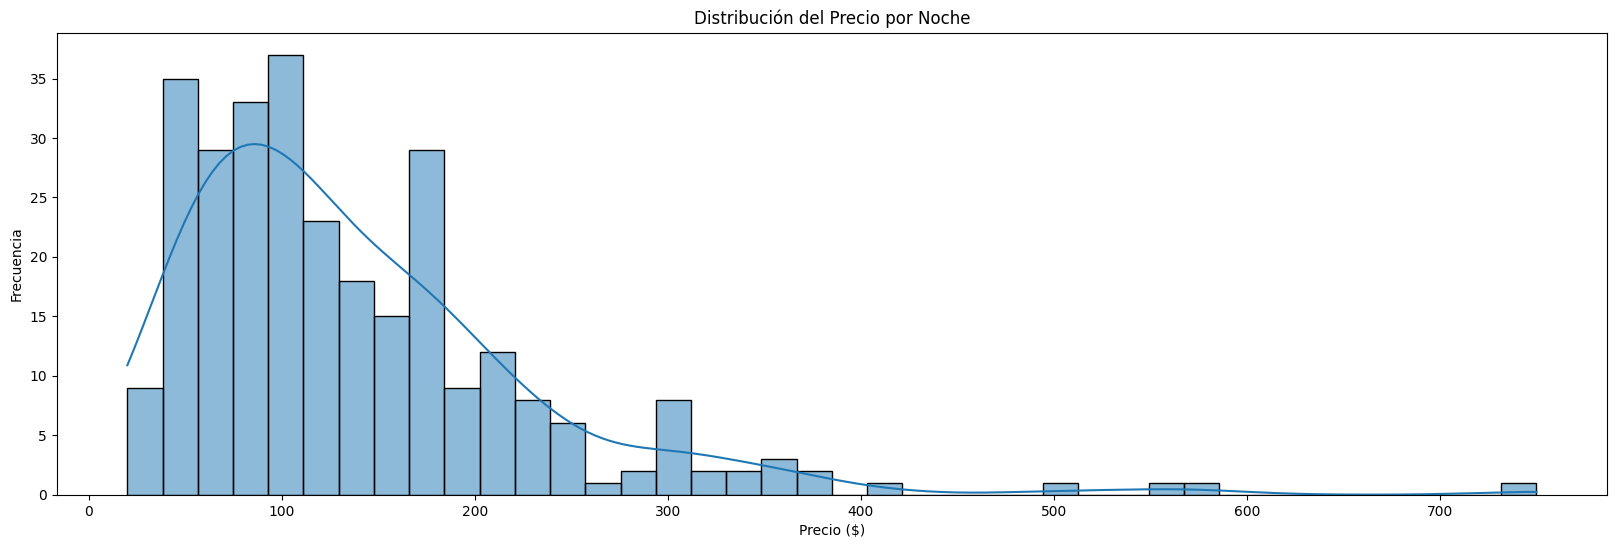

In [32]:
# Gráfico de distribución para el precio
plt.figure(figsize=(20, 6))
sns.histplot(df_selected['price'], bins=40, kde=True)
plt.title('Distribución del Precio por Noche')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()


Lo anterior, permite entender el rango tipico de precios por noche. Se evidencia valores poca demanda de propiedades con valores altos por noche superiores a los $400, por otro lado, se evidencia una frecuencia mayor en valores inferiores por noche

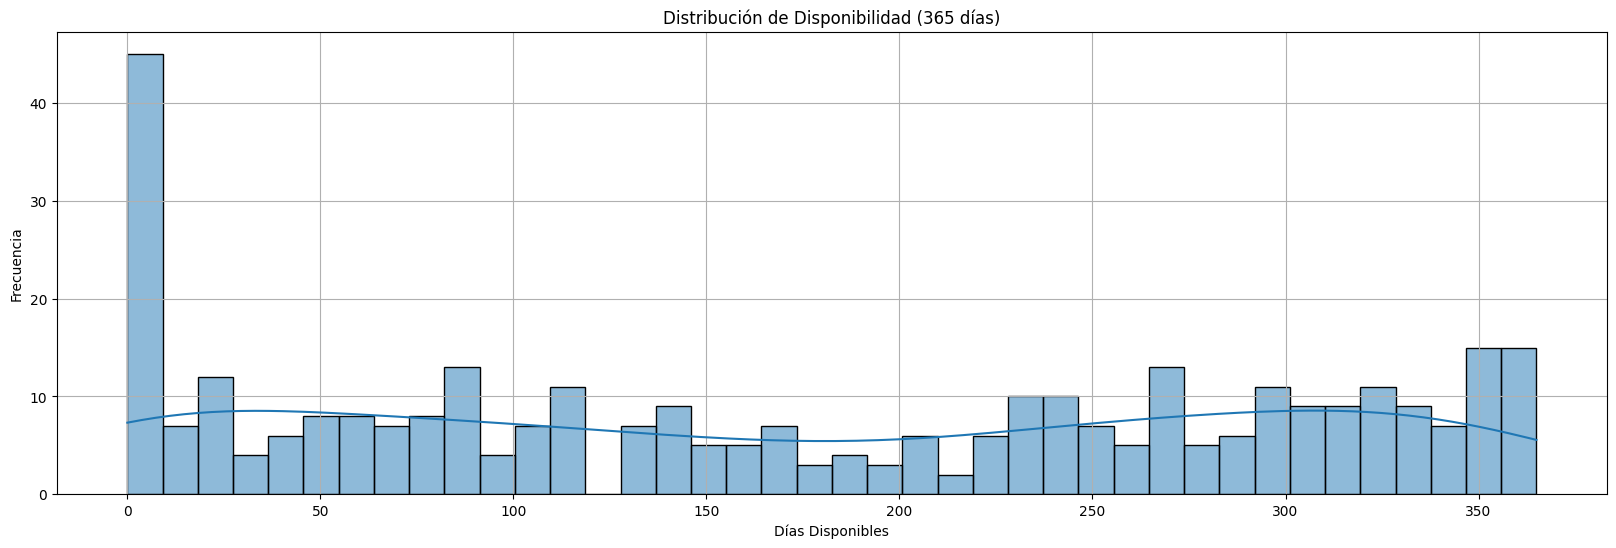

In [34]:
# Gráfico de distribución para la disponibilidad
plt.figure(figsize=(20, 6))
sns.histplot(df_selected['availability_365'], bins=40, kde=True)
plt.title('Distribución de Disponibilidad (365 días)')
plt.xlabel('Días Disponibles')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

Con el anterior histograma, se analiza cuántos días están disponibles las propiedades (sin uso) de AirBnB durante el año. <br/>
Se evidencia que pocos días la propiedad no es muy apetecidad, dado que puede ser por motivos vacacionales que se alquilan las mismas con una duración superior a un día.

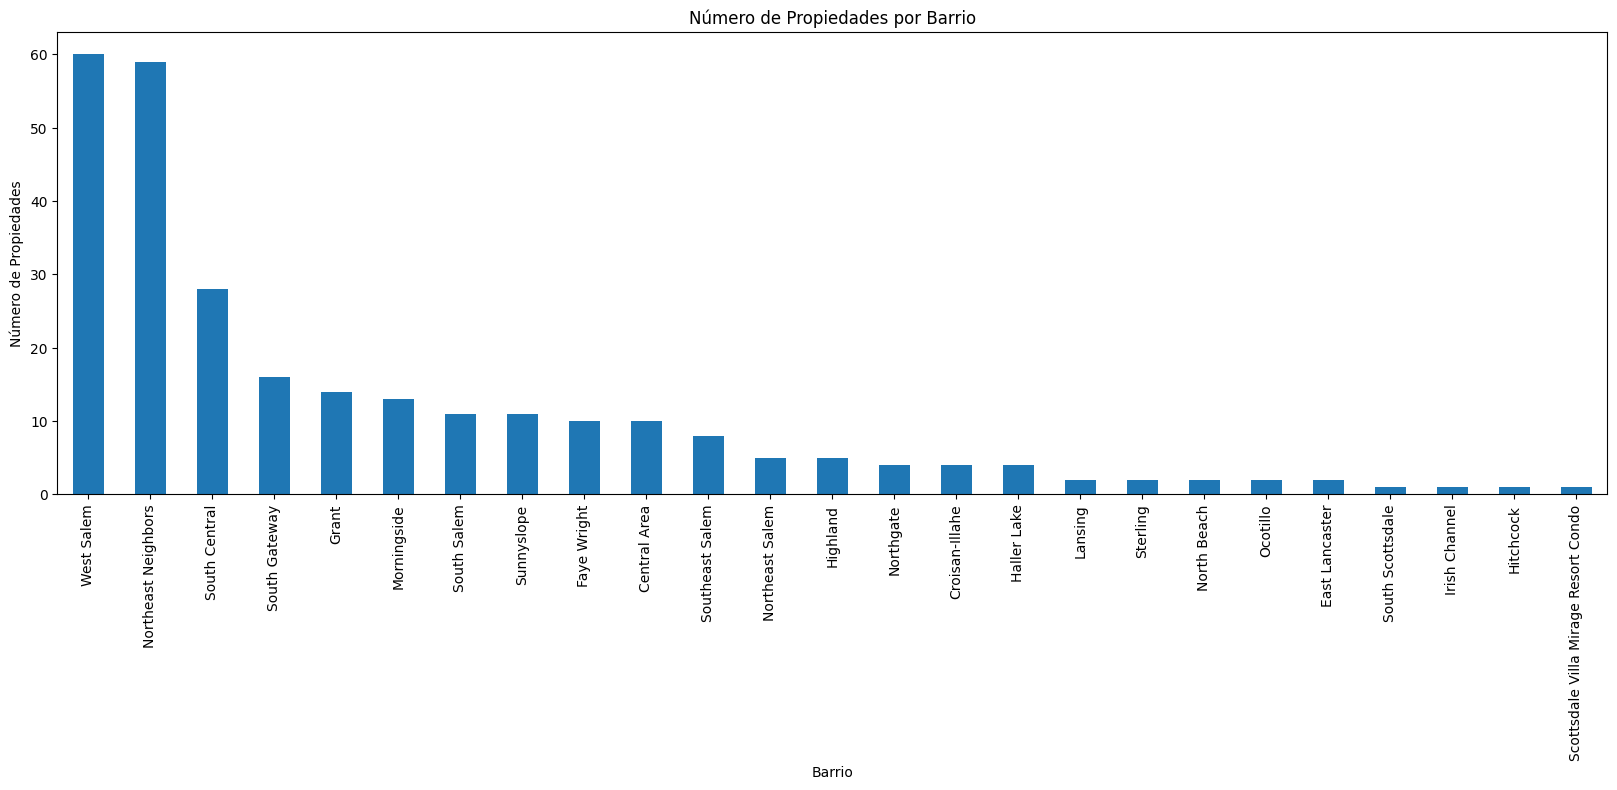

In [36]:
# Histograma para el host_neighbourhood
plt.figure(figsize=(20, 6))
df_selected['host_neighbourhood'].value_counts().plot(kind='bar')
plt.title('Número de Propiedades por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Número de Propiedades')
plt.show()

El anterior, evidencia la cantidad de propiedades disponibles por barrio, lo cual puede ayudar en temas de ubicación geografica y niveles de demanda por zonas.

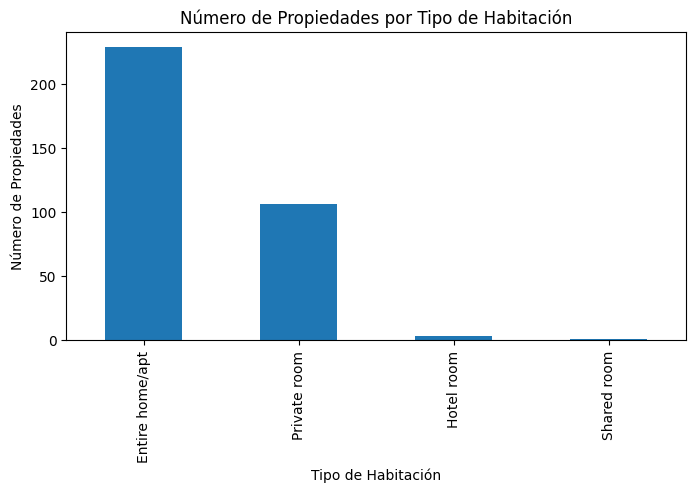

In [38]:
# Gráfico de barras para room_type
plt.figure(figsize=(8, 4))
df_selected['room_type'].value_counts().plot(kind='bar')
plt.title('Número de Propiedades por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Número de Propiedades')
plt.show()

La anterior visualización, denota que las propiedades de mayor demanda son las de tipo 'Entire home/apt', lo cual indica una preferencia de este tipo por parte de los huéspedes.

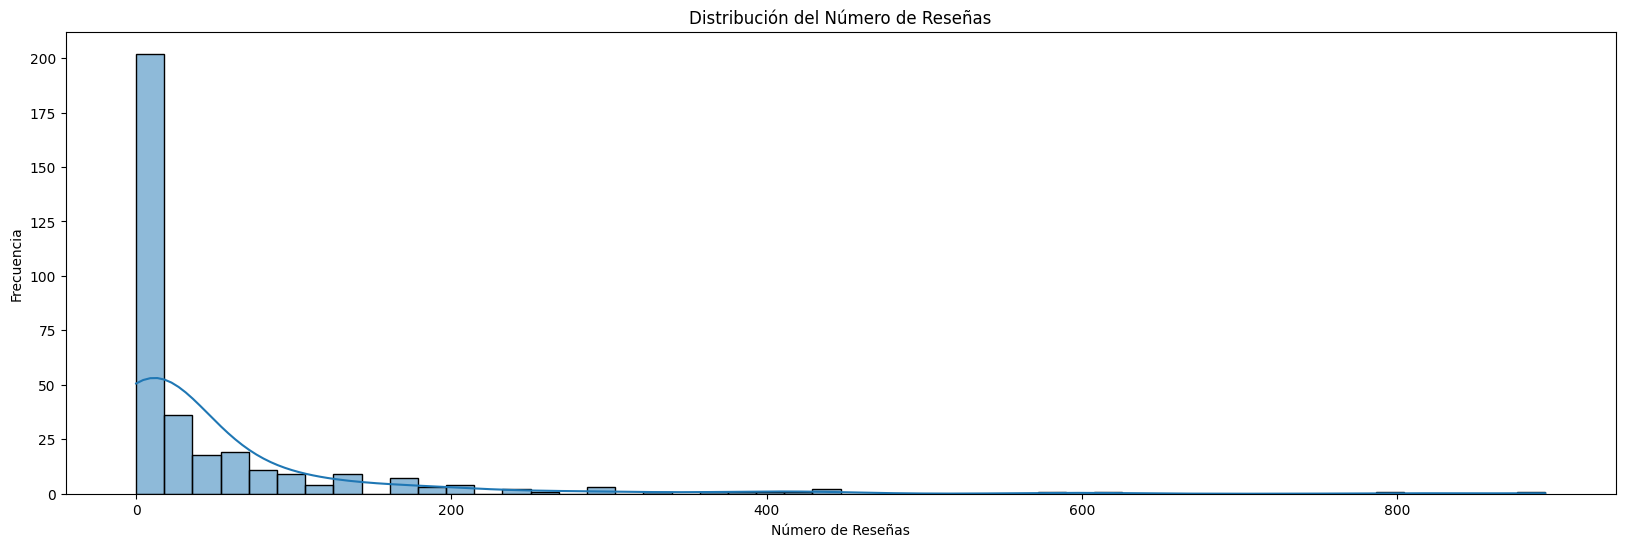

In [40]:
# Gráfico de distribución del número de reseñas
plt.figure(figsize=(20, 6))
sns.histplot(df_selected['number_of_reviews'], bins=50, kde=True)
plt.title('Distribución del Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()

El anterior gráfico, evidencia la cantidad de reseñas/reviews que tiene las propiedades, lo permite observar las propiedades más populares

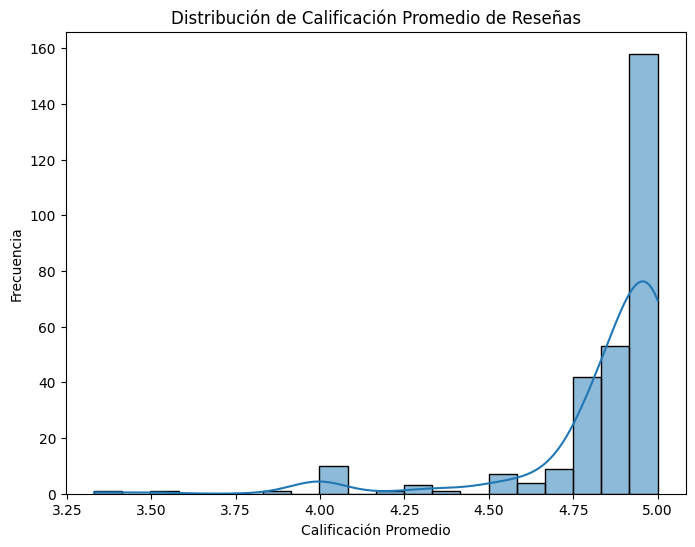

In [42]:
# Gráfico de distribución de calificación promedio
plt.figure(figsize=(8, 6))
sns.histplot(df_selected['review_scores_rating'], bins=20, kde=True)
plt.title('Distribución de Calificación Promedio de Reseñas')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

La calificación promedio afecta la decisión de los huéspedes y puede influir en la ocupación; por ejemplo, en el anterior se ve una cantidad importante de propiedades con una buena calificación de las mismas.

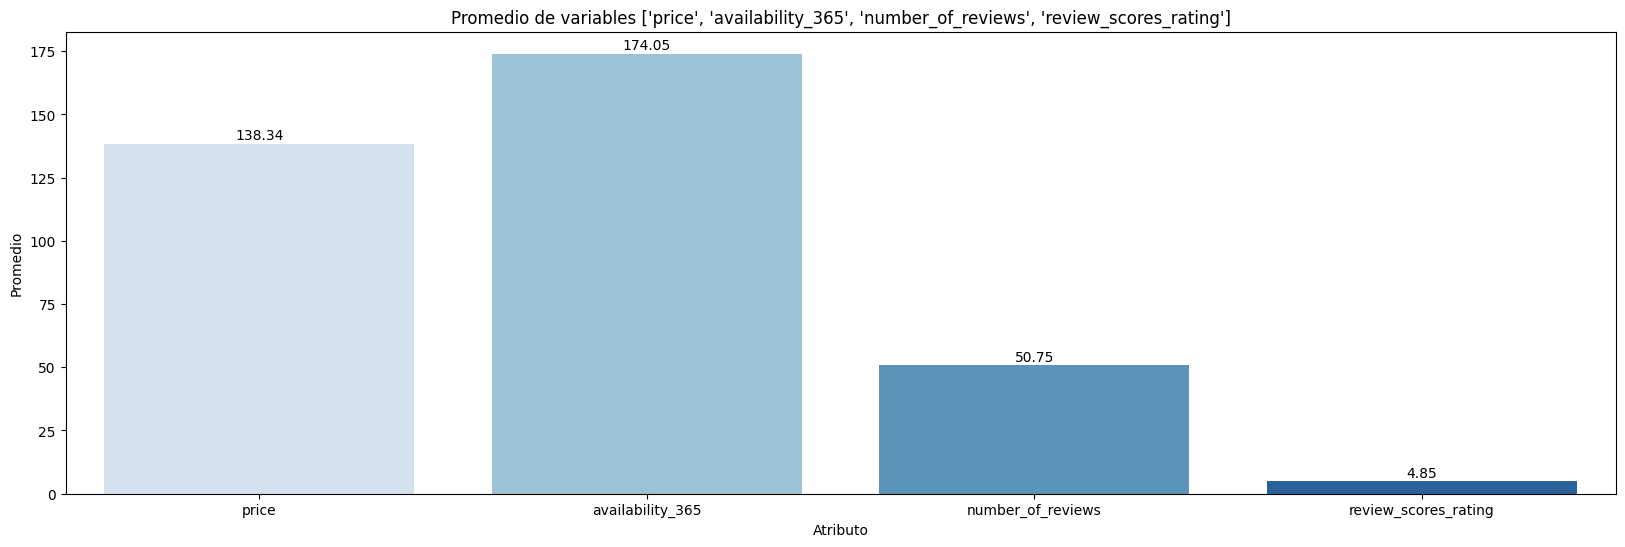

In [44]:
# Se realiza un promedio de datos númericos 'price','availability_365', 'number_of_reviews', 'review_scores_rating'
promedios = [df_selected[atributo].mean() for atributo in df_selected.loc[:, ~df_selected.columns.isin(['host_neighbourhood','room_type'])]]

cols = ['price','availability_365', 'number_of_reviews', 'review_scores_rating']

plt.figure(figsize=(20, 6))
sns.barplot(x=cols, y=promedios, palette='Blues')
plt.title(f'Promedio de variables {cols}')
plt.xlabel('Atributo')
plt.ylabel('Promedio')

# Agregar los valores a cada barra
for i, v in enumerate(promedios):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')
    
plt.show()

Lo anterior evidencia, que un precio promedio de precios oscila entre los `$`125 y `$`150

Como analisis adicional, se enuncia a continuación un top de comodidades/facilidades que los huéspedes ven en los Airbnb:

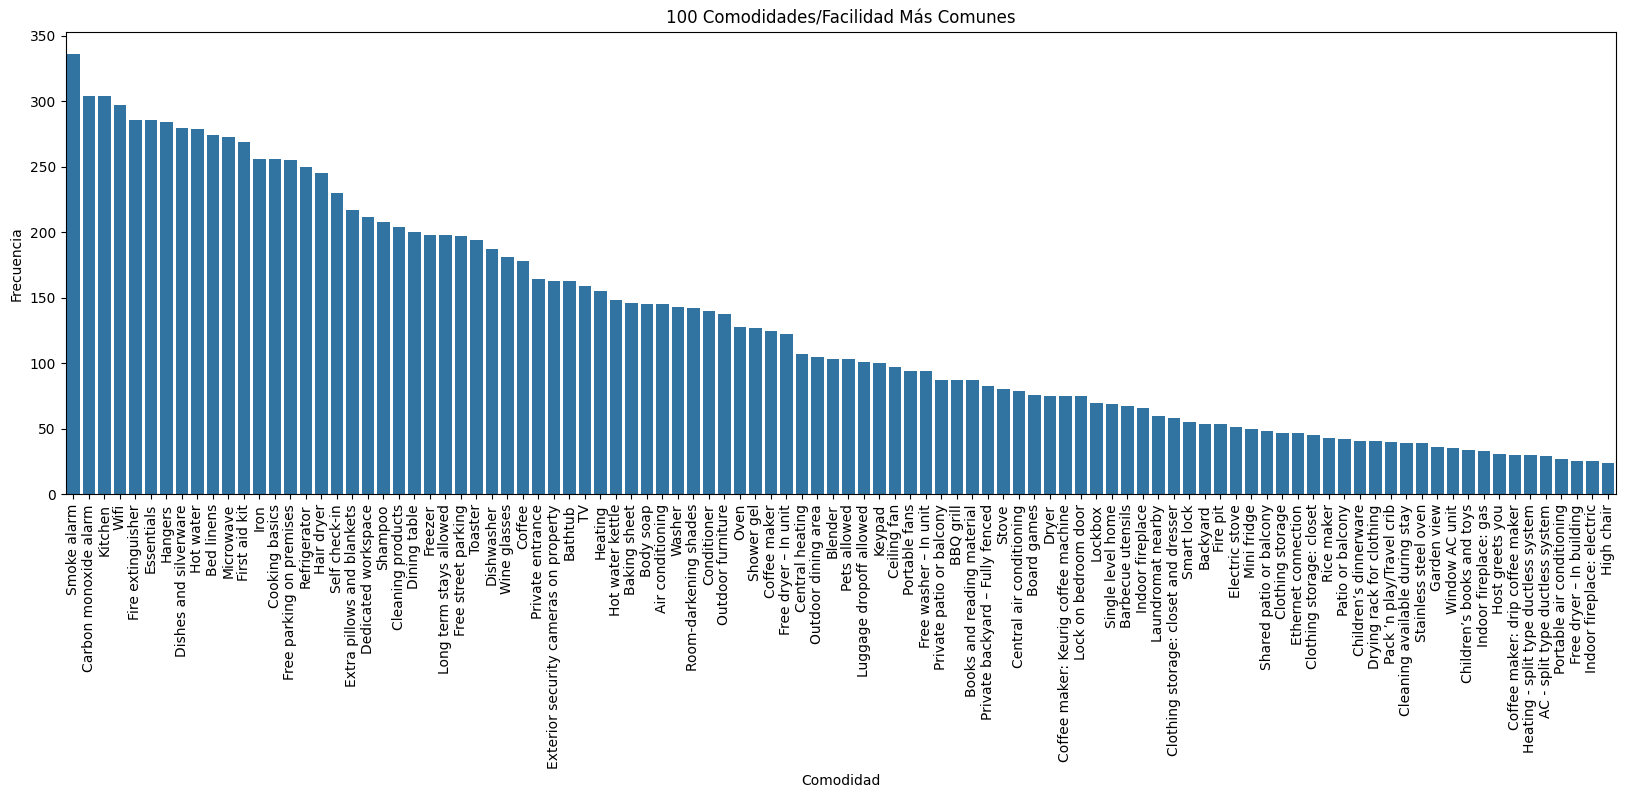

In [47]:
# Convertir en lista el campo amenities
listings_df['amenities_list'] = listings_df['amenities'].apply(ast.literal_eval).astype(object)

# Convertir la lista en varias filas para análisis
all_amenities = listings_df['amenities_list'].explode()

# Obtener la frecuencia de cada amenities
amenities_counts = all_amenities.value_counts()

top = 100 
# Seleccionar el top 10 de amenities más comunes
top_amenities = amenities_counts.head(top)

# Visualización del top 
plt.figure(figsize=(20, 6))
sns.barplot(x=top_amenities.index, y=top_amenities.values)
plt.xticks(rotation=90)
plt.title(f'{top} Comodidades/Facilidad Más Comunes')
plt.xlabel('Comodidad')
plt.ylabel('Frecuencia')
plt.show()

## Analisis Bivariado
([Volver al inicio](#Dataset))

Con los atributos seleccionador, se pretende identificar qué factores influyen más en la rentabilidad y ocupación de las propiedades. Esto incluye correlaciones y comparaciones entre variables clave:
1. Analizar correlación entre precio y disponibilidad:  determina si las propiedades con precios altos o bajos tienen mayor o menor ocupación, con el fin de maximizar los ingresos.
2. Analizar los precios por barrio: con el fin de terminar las ubicaciones más relevantes y de mayor demanda.
3. Comparar precios por tipo de propiedad: identificación de tipos de propiedad más rentables y de mayor uso por parte de los huéspedes.


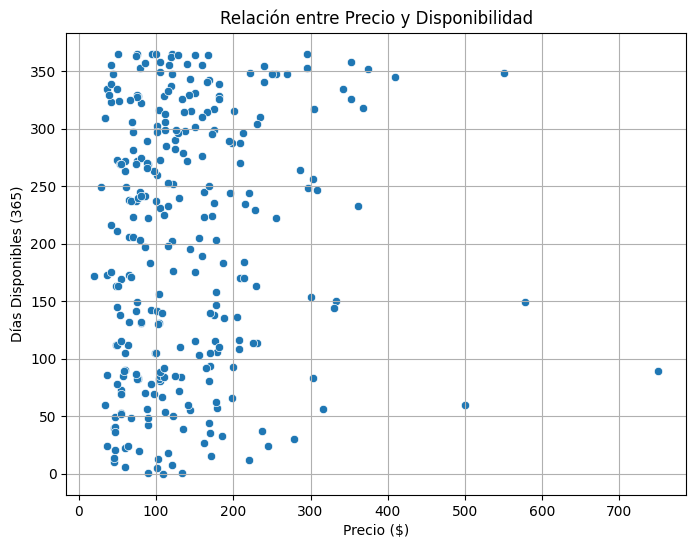

In [50]:
# Análisis de correlación entre price y availability_365
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='availability_365', data=df_selected)
plt.title('Relación entre Precio y Disponibilidad')
plt.xlabel('Precio ($)')
plt.ylabel('Días Disponibles (365)')
plt.grid()
plt.show()

In [51]:
correlation = df_selected['price'].corr(df_selected['availability_365'])
print(f'Coeficiente de correlación: {correlation}')

Coeficiente de correlación: 0.1043676164127557


El resultado anterior, no denota una tendencia marcada/lineal entre el precio y la disponibilidad; lo que quiere decir que no hay una correlación marcada entre los atributos.

In [53]:
# Se realiza una comparación entre price, host_neighbourhood 
fig = px.scatter(df_selected, 
                 x='price', 
                 y='host_neighbourhood',
                 width=1024, 
                 height=800,
                 color='host_neighbourhood') 
fig.update_layout(xaxis_title="Precio",yaxis_title="Barrio", showlegend=False)
fig.show()

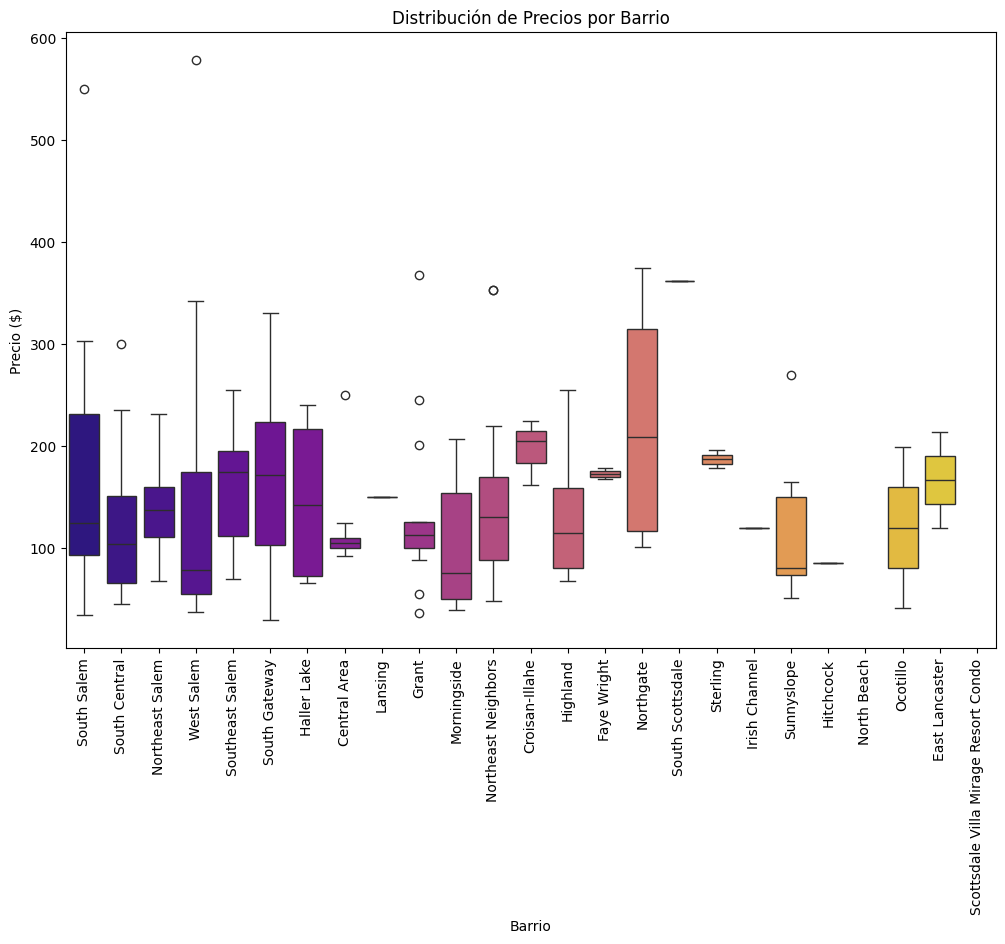

In [54]:
# Comparar distribución de price por host_neighbourhood
# Se hace uso de un boxplot, para comparar la variable continua (price) con una categorica como lo es host_neighbourhood
plt.figure(figsize=(12, 8))
sns.boxplot(x='host_neighbourhood', y='price', data=df_selected, palette='plasma')
plt.title('Distribución de Precios por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio ($)')
plt.xticks(rotation=90)
plt.show()

Para complementar el gráfico anterior se realiza un analisis de pareto

In [56]:
# Normalización del atributo host_neighbourhood a traves de conteos
neighbourhood_frec_cumsum = df_selected["host_neighbourhood"].value_counts(normalize=True).cumsum()
neighbourhood_frec_cumsum

host_neighbourhood
West Salem                              0.217391
Northeast Neighbors                     0.431159
South Central                           0.532609
South Gateway                           0.590580
Grant                                   0.641304
Morningside                             0.688406
South Salem                             0.728261
Sunnyslope                              0.768116
Faye Wright                             0.804348
Central Area                            0.840580
Southeast Salem                         0.869565
Northeast Salem                         0.887681
Highland                                0.905797
Northgate                               0.920290
Croisan-Illahe                          0.934783
Haller Lake                             0.949275
Lansing                                 0.956522
Sterling                                0.963768
North Beach                             0.971014
Ocotillo                                0.978261
E

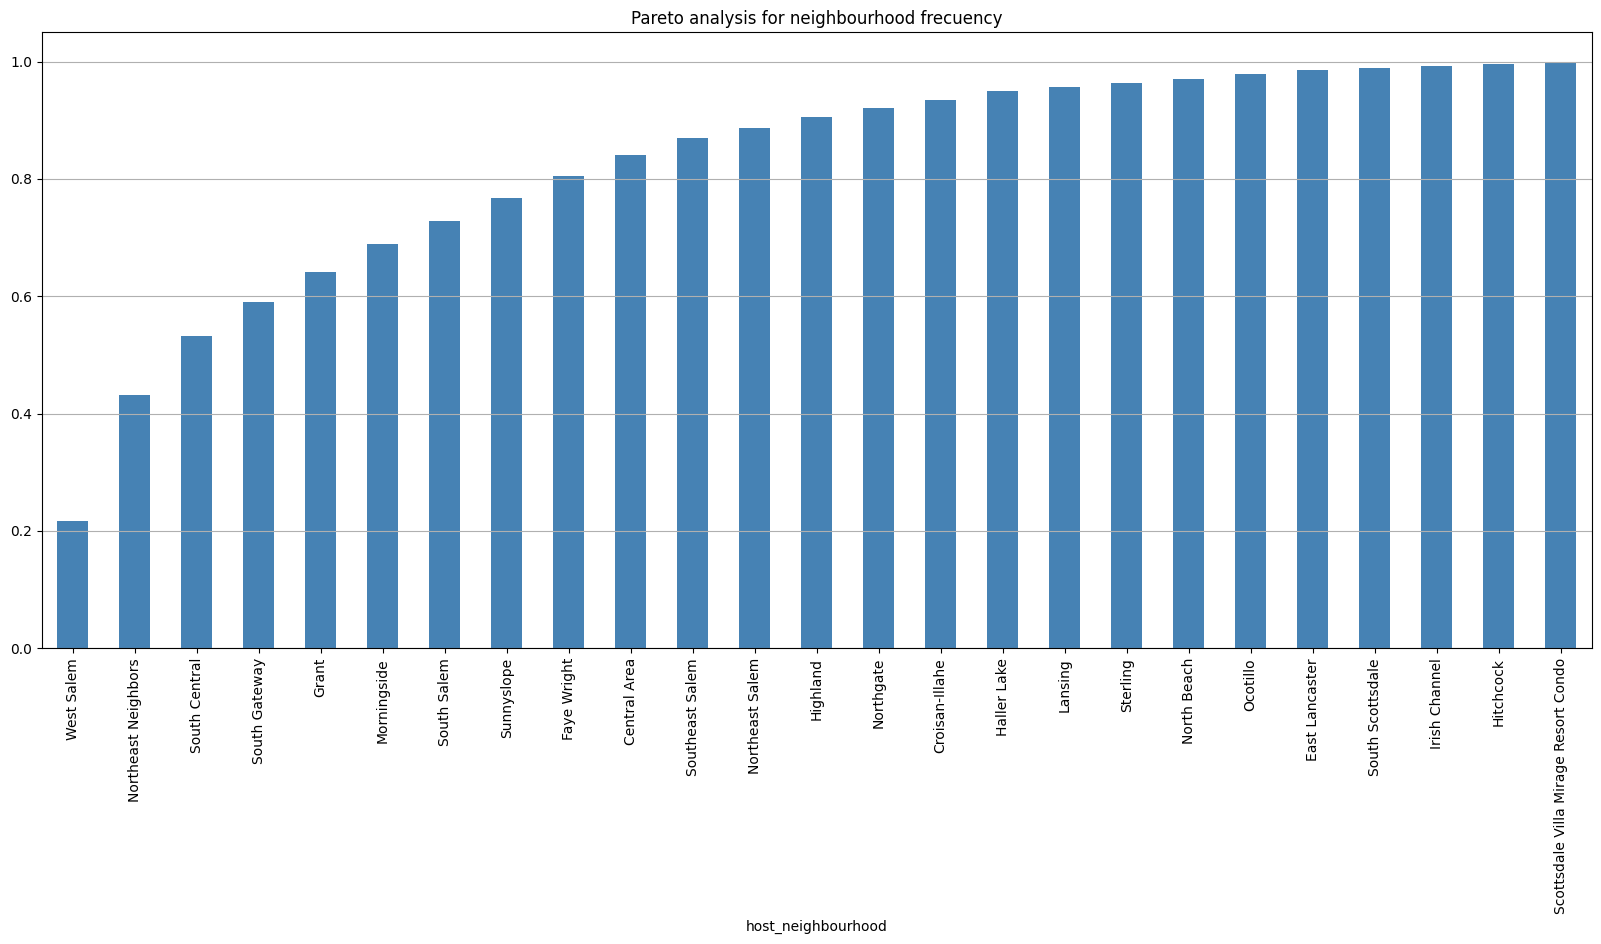

In [57]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [58]:
# Se realiza una lista de los host_neighbourhood que más representan los datos y/o concentran el 80%
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['West Salem',
 'Northeast Neighbors',
 'South Central',
 'South Gateway',
 'Grant',
 'Morningside',
 'South Salem',
 'Sunnyslope']

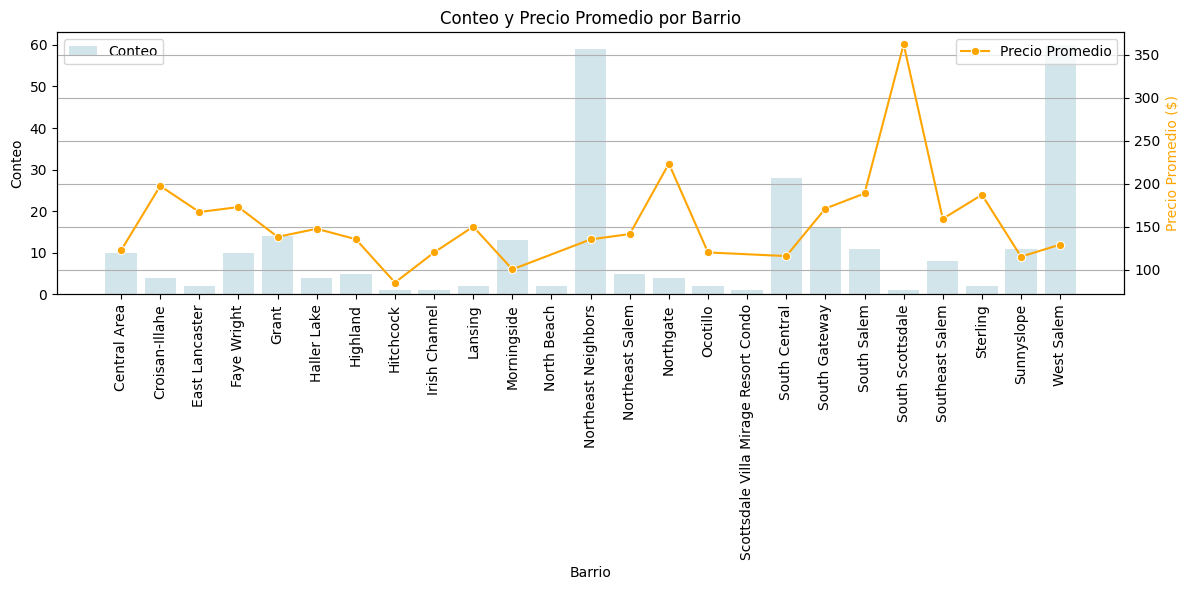

In [59]:
# Calcular el conteo y el precio promedio por barrio
neighbourhood_analysis = df_selected.groupby('host_neighbourhood').agg(
    count=('host_neighbourhood', 'count'),
    avg_price=('price', 'mean')
).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar_ax = sns.barplot(x='host_neighbourhood', y='count', data=neighbourhood_analysis, color='lightblue', label='Conteo', alpha=0.6)

# Crear un segundo eje para el precio promedio
ax2 = bar_ax.twinx()  # Usar el eje de barras
sns.lineplot(x='host_neighbourhood', y='avg_price', data=neighbourhood_analysis, color='orange', marker='o', label='Precio Promedio', ax=ax2)

# Configuración del gráfico
plt.title('Conteo y Precio Promedio por Barrio')
bar_ax.set_xlabel('Barrio')
bar_ax.set_ylabel('Conteo')
ax2.set_ylabel('Precio Promedio ($)', color='orange')

# Rotar los nombres del eje X usando set_xticklabels
bar_ax.set_xticklabels(neighbourhood_analysis['host_neighbourhood'], rotation=90)

# Agregar leyendas
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.tight_layout() 
plt.show()


Con el gráfico anterior, se evidencia y comprueba que los barrios de mayor demanda y menor precio son 'West Salem', 'Northeast Neighbors', 'South Central', 'South Gateway'

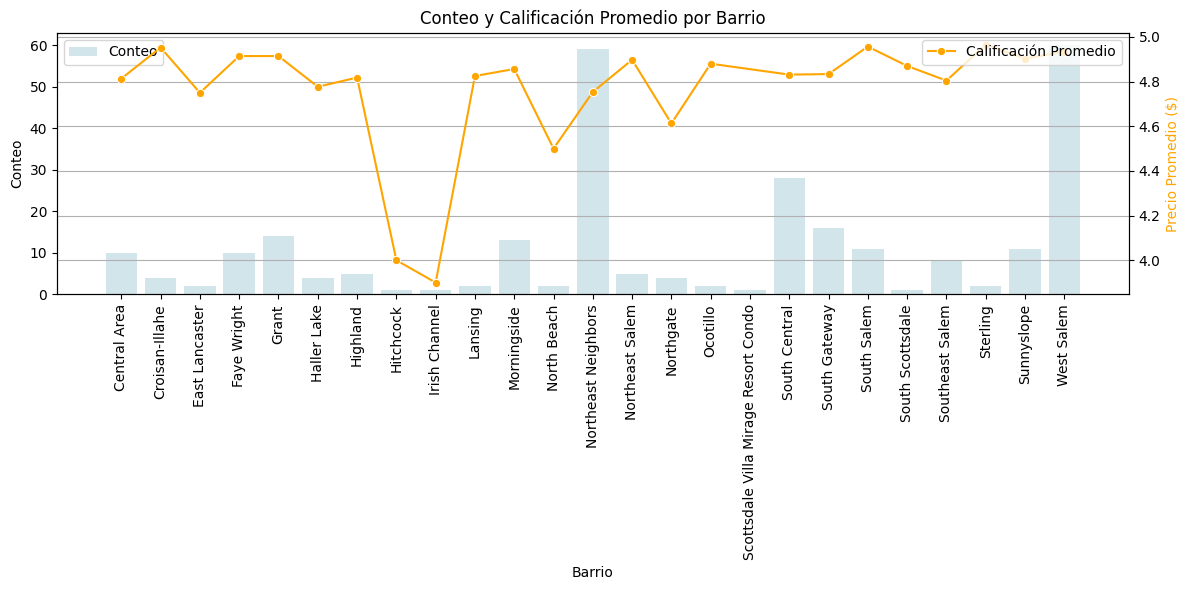

In [61]:
# Calcular el conteo y el precio promedio por barrio
neighbourhood_analysis = df_selected.groupby('host_neighbourhood').agg(
    count=('host_neighbourhood', 'count'),
    avg_price=('review_scores_rating', 'mean')
).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar_ax = sns.barplot(x='host_neighbourhood', y='count', data=neighbourhood_analysis, color='lightblue', label='Conteo', alpha=0.6)

# Crear un segundo eje para el precio promedio
ax2 = bar_ax.twinx()  # Usar el eje de barras
sns.lineplot(x='host_neighbourhood', y='avg_price', data=neighbourhood_analysis, color='orange', marker='o', label='Calificación Promedio', ax=ax2)

# Configuración del gráfico
plt.title('Conteo y Calificación Promedio por Barrio')
bar_ax.set_xlabel('Barrio')
bar_ax.set_ylabel('Conteo')
ax2.set_ylabel('Precio Promedio ($)', color='orange')

# Rotar los nombres del eje X usando set_xticklabels
bar_ax.set_xticklabels(neighbourhood_analysis['host_neighbourhood'], rotation=90)

# Agregar leyendas
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.tight_layout() 
plt.show()


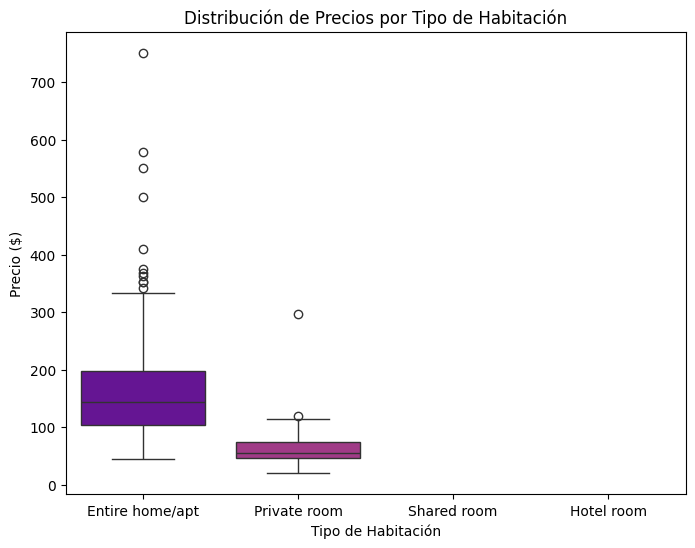

In [62]:
# Comparar price por room_type
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df_selected, palette='plasma')
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio ($)')
plt.show()

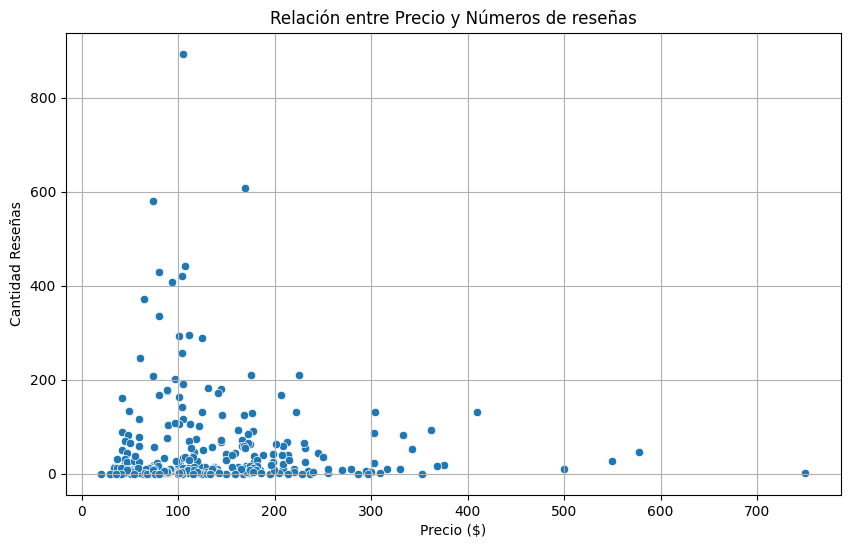

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=df_selected)
plt.title('Relación entre Precio y Números de reseñas')
plt.xlabel('Precio ($)')
plt.ylabel('Cantidad Reseñas')
plt.grid()
plt.show()

In [64]:
correlation = df_selected['price'].corr(df_selected['number_of_reviews'])
print(f'Coeficiente de correlación: {correlation}')

Coeficiente de correlación: -0.05218798003676232


Se evidencia una correlación negativa, lo que sugiere que no hay relación clara entre el precio y la cantidad de calificaciones/reseñas; es decir, las propiedades de mayor valor no parecen recibir más o menos reseñas que con los más baratos.

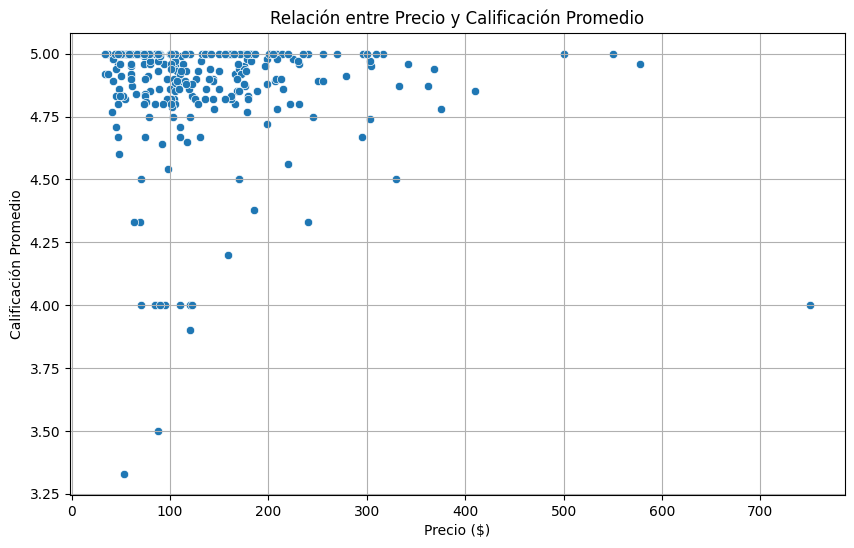

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=df_selected)
plt.title('Relación entre Precio y Calificación Promedio')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación Promedio')
plt.grid()
plt.show()

In [67]:
correlation = df_selected['price'].corr(df_selected['review_scores_rating'])
print(f'Coeficiente de correlación: {correlation}')

Coeficiente de correlación: -0.010872207874260527


Se evidencia una correlación negativa entre price y review_scores_rating; lo que indica que no hay una relación significativa entre el precio de la propiedad y las reseñas/calificaciones promedio.

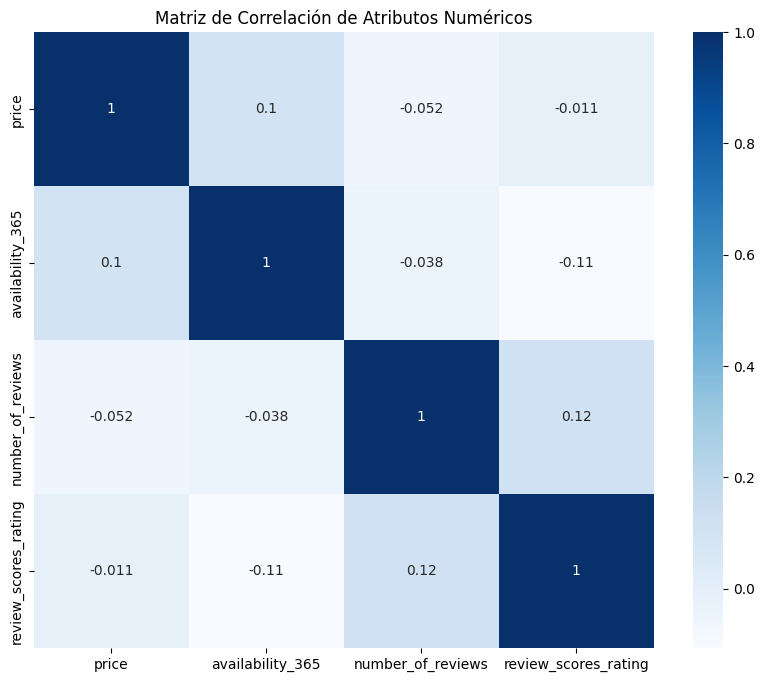

In [69]:
# Correlación de atributos numéricos
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.loc[:, ~df_selected.columns.isin(['host_neighbourhood','room_type'])].corr(), annot=True, cmap='Blues')
plt.title('Matriz de Correlación de Atributos Numéricos')
plt.show()

Se evidencian correlaciones negativas, lo que quiere decir que no se tiene influencia una variable con otra y hay correlaciones positivas pero sin un valor significativo como para mencionar que influye entre las variables en sí.

## Analisis Multivariado

In [72]:
# Se realiza una comparación entre price, host_neighbourhood y room_type
fig = px.scatter(df_selected, 
                 x='price', 
                 y='host_neighbourhood',
                 width=1024, 
                 height=800,
                 labels={
                     "room_type": "Tipo Habitación"
                 },
                 color='room_type') 
fig.update_layout(xaxis_title="Precio",yaxis_title="Barrio")
fig.show()

Lo anterior, denota que los huéspedes tienden a elegir una propiedad completa ('Entire Home/apt') sin importar el precio; así mismo se evidencia que el de mayor demanda es el barrio 'West Salem' 

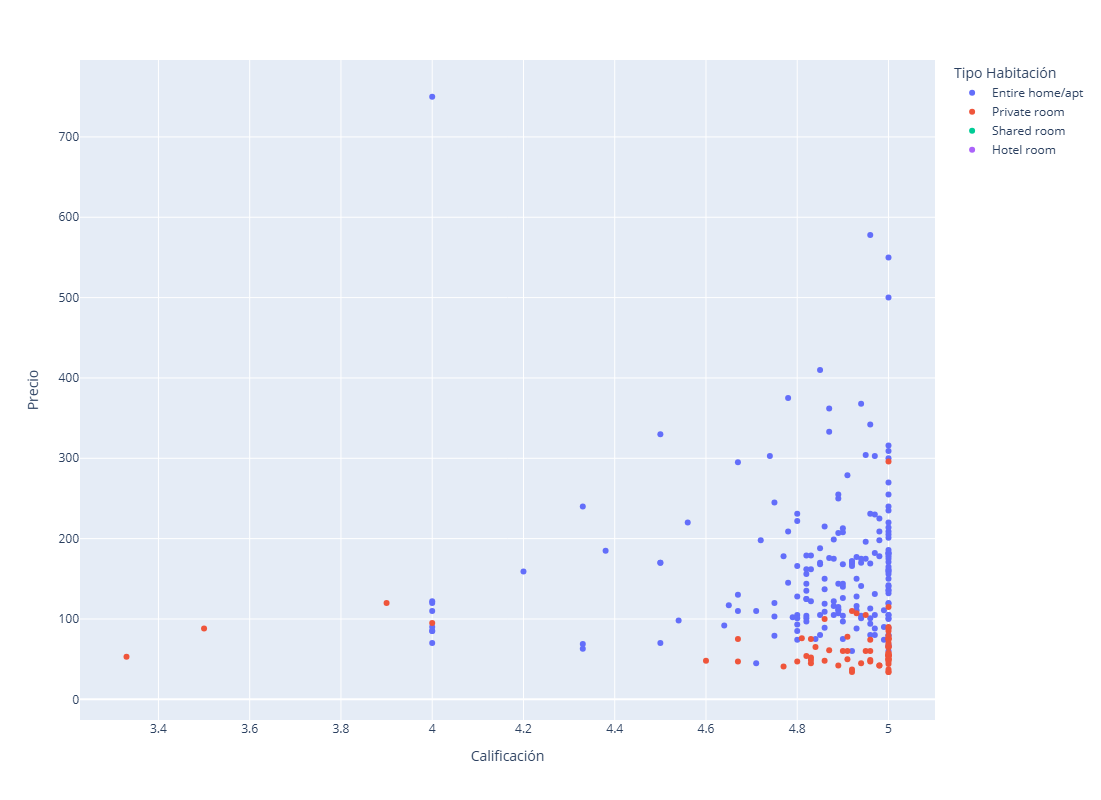

In [74]:
# Se realiza una comparación entre price, review_scores_rating y room_type
fig = px.scatter(df_selected, 
                 x='review_scores_rating',
                 y='price', 
                 width=1024, 
                 height=800,
                 labels={
                     "room_type": "Tipo Habitación"
                 },
                 color='room_type') 
fig.update_layout(xaxis_title="Calificación",yaxis_title="Precio")
fig.show()

Con el gráfico anterior, se puede evidenciar que precios inferiores a $400 y el tipo de habitación 'Entire home/apt' tienden a obtiener calificaciones más altas con mayor frecuencia.

## Conclusiones
([Volver al inicio](#Dataset))

De acuerdo con los datos obtenidos y variables seleccionadas, se brindan las siguientes recomendaciones para inversión:
- Los barrios con mayor demanda son 'West Salem', 'Northeast Neighbors', 'South Central', 'South Gateway'; en los cuales se debe dirigir la propuesta de inversión y expansión de propiedades
- Se deben evitar los barrios/zonas de 'Irish Channel', 'Hitchcock' y 'Scottsdale Villa Mirage Resort Condo' dada la baja aprobación/calificación de usuarios y demanda por parte de huéspedes.
- Las propiedades completas (Entire home/apt) tienen mayor demanda, por lo cual es un foco del tipo de hospedaje que se debe brindar.
- Se debe brindar comodidades comunes y/o de mayopr demanda como lo son 'Smoke alarm', 'Carbon monoxide alarm', 'Kitchen', 'Wifi', 'Fire extinguisher', 'Dishes and silverware', 'Hot water', 'Bed linens'